# Region & Domain
Germany, European Union
Sports & Athletics

# Research Question
How did wages affect the performance of football teams in the Bundesliga between 2016 and 2020?

In [9]:
%matplotlib notebook

import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.ticker import ScalarFormatter
from matplotlib.colors import ListedColormap
import pandas as pd
import numpy as np

plt.style.use('seaborn')

In [10]:
wages = pd.read_csv('/Users/riro/Documents/GitHub/umich_ds/plotting/data/bundesliga_wages.csv', skipfooter=2, engine='python')

def clean_wages(df):
    '''A function that cleans the wages database and converts the currency format to numbers.'''
    df = df.drop('Unnamed: 5', axis=1).set_index('Team')
    df = df.replace('[\$,]', '', regex=True).astype(float)
    
    return df

wages = clean_wages(wages)

In [11]:
def get_league_table(year):
    '''A function that takes a year as an argument and returns the league table with the index set to the team names.'''
    df = pd.read_csv(f'/Users/riro/Documents/GitHub/umich_ds/plotting/data/bundesliga_{year}.csv')
    df.set_index('Squad', inplace=True)
    
    return df

<IPython.core.display.Javascript object>


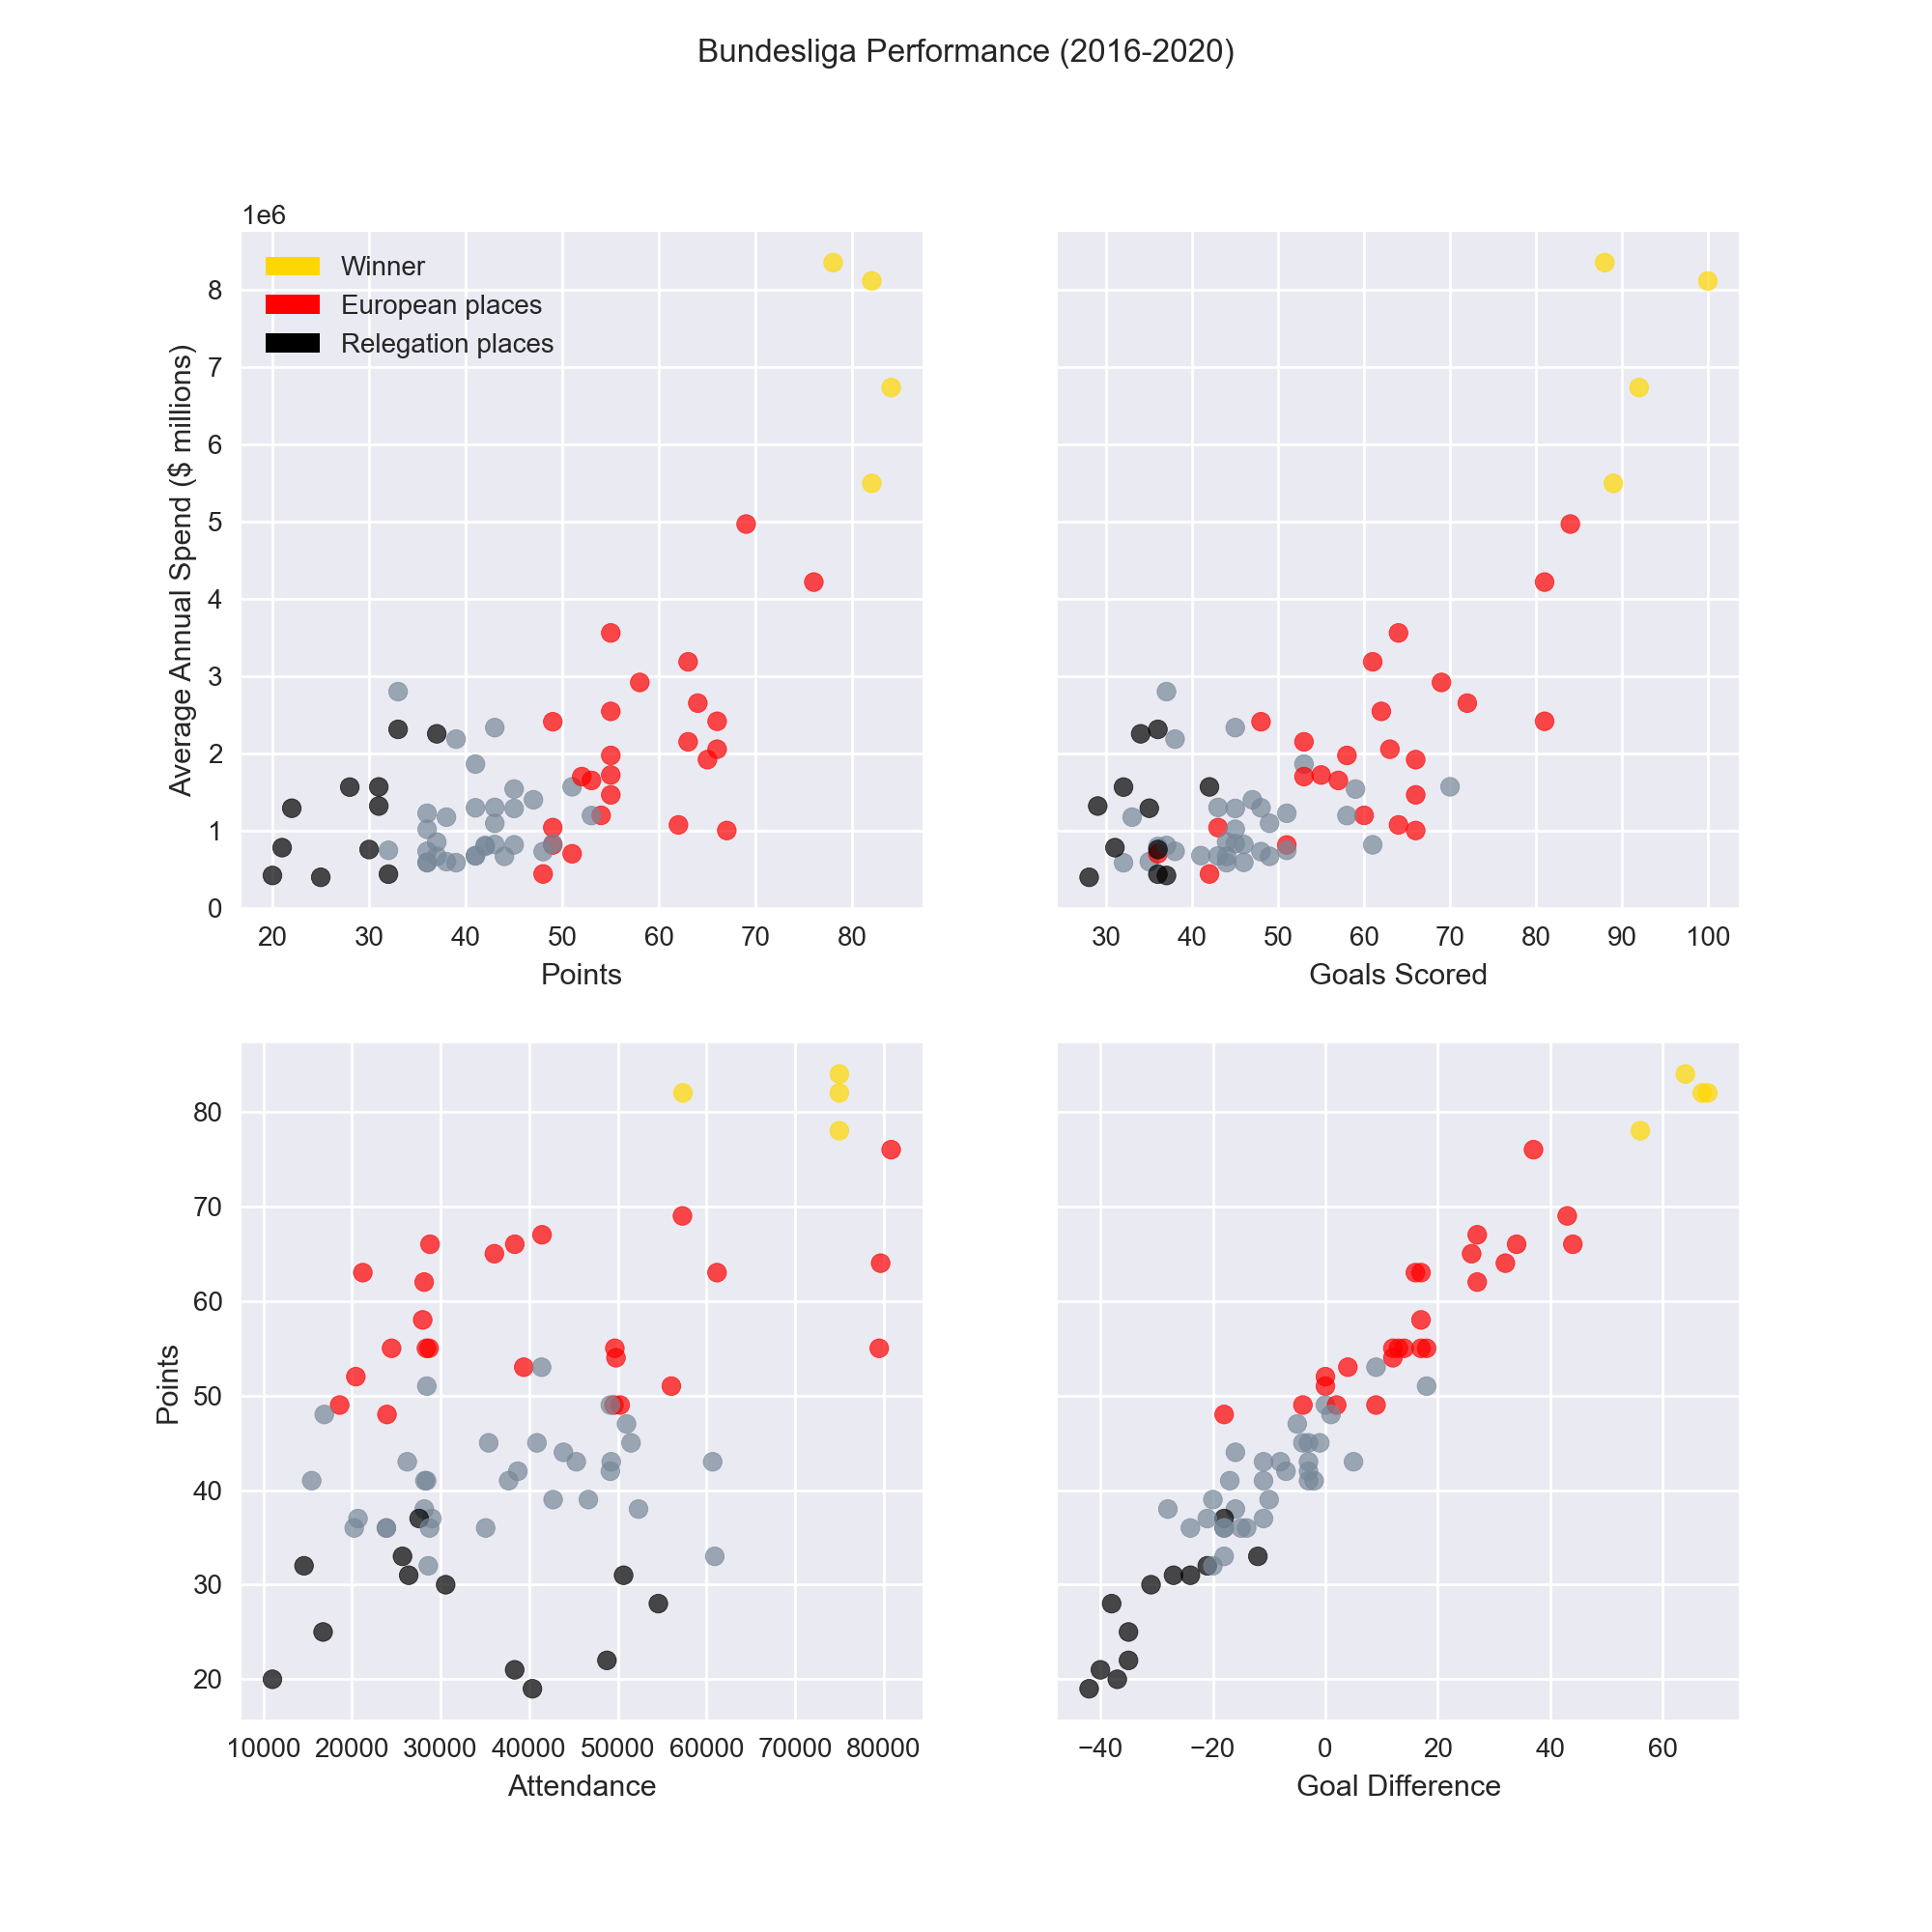

In [13]:
def color(x):
    if x == 1:
        return 'gold'
    elif x >=2 and x <= 7:
        return 'red'
    elif x >= 16:
        return 'black'
    else:
        return 'lightslategrey'

def wages_vs_points(year):
    df = get_league_table(year)
    df = df.join(wages[str(year)])  
    x = df['Pts']
    y = df[str(year)]
    
    df['color'] = df['Rk'].apply(color)
    cmap = ListedColormap(df['color'])
    
    return [x, y, df['color'], cmap]

def wages_vs_goals(year):
    df = get_league_table(year)
    df = df.join(wages[str(year)])  
    x = df['GF']
    y = df[str(year)]
    
    df['color'] = df['Rk'].apply(color)
    cmap = ListedColormap(df['color'])
    
    return [x, y, df['color'], cmap]
    

def crowd_vs_points(year):
    df = get_league_table(year)
    x = df['Attendance']
    y = df['Pts']
    
    df['color'] = df['Rk'].apply(color)
    cmap = ListedColormap(df['color'])
    
    return [x, y, df['color'], cmap]
    

def gd_vs_points(year):
    df = get_league_table(year)
    x = df['GDiff']
    y = df['Pts']
    
    df['color'] = df['Rk'].apply(color)
    cmap = ListedColormap(df['color'])
    
    return [x, y, df['color'], cmap]


fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(10, 10))
alpha=0.7

for i in range(2016, 2020):
    ax1.scatter(wages_vs_points(f'{i}')[0], 
                wages_vs_points(f'{i}')[1], 
                alpha = alpha, 
                c = wages_vs_points(f'{i}')[2], 
                cmap = wages_vs_points(f'{i}')[3])
    
    ax2.scatter(wages_vs_goals(f'{i}')[0], 
                wages_vs_goals(f'{i}')[1], 
                alpha = alpha, 
                c = wages_vs_goals(f'{i}')[2], 
                cmap = wages_vs_points(f'{i}')[3])
    
    ax3.scatter(crowd_vs_points(f'{i}')[0], 
                crowd_vs_points(f'{i}')[1], 
                alpha = alpha, 
                c = crowd_vs_points(f'{i}')[2], 
                cmap = crowd_vs_points(f'{i}')[3])
    
    ax4.scatter(gd_vs_points(f'{i}')[0], 
                gd_vs_points(f'{i}')[1], 
                alpha = alpha, 
                c = gd_vs_points(f'{i}')[2], 
                cmap = gd_vs_points(f'{i}')[3])
    

ax1.set_xlabel('Points')
ax1.set_ylabel('Average Annual Spend ($ millions)')

ax2.set_xlabel('Goals Scored')
ax2.set_yticklabels([])

ax3.set_xlabel('Attendance')
ax3.set_ylabel('Points')

ax4.set_xlabel('Goal Difference')
ax4.set_yticklabels([])

plt.gca()
plt.suptitle('Bundesliga Performance (2016-2020)')

categories = ['Winner','European places','Relegation places']
colors = ['gold','red','black']
recs = []
for i in range(0,len(colors)):
    recs.append(mpatches.Rectangle((0,0),1,1, fc=colors[i]))
ax1.legend(recs, categories, loc=2)

plt.savefig('bundesliga_performance', dpi=300)